In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_style('whitegrid')

In [8]:
df = pd.read_csv('transfusion.txt')

<strong>WHERE:</strong>  
R (Recency - months since last donation),  
F (Frequency - total number of donation),  
M (Monetary - total blood donated in c.c.),  
T (Time - months since first donation), and  
a binary variable representing whether he/she donated blood in March 2007 (1   
stand for donating blood; 0 stands for not donating blood).  

In [9]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Let's check out what the describe and corr method can give us about the data we have

In [29]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [117]:
df.corr()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
whether he/she donated blood in March 2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


C:\Users\vasil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


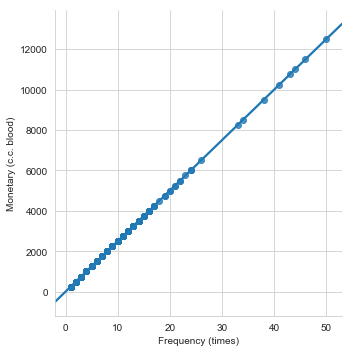

In [144]:
sns.lmplot(data=df,x='Frequency (times)', y='Monetary (c.c. blood)') # corr = 1.0

In [115]:
df[df['Frequency (times)'] == 1]['Monetary (c.c. blood)'].unique()

array([250], dtype=int64)

Couple of interesting points I should take note off:  
- (mean of Frequency):  
    I cannot just say that most people donate blood around 5 times because I have a very large standard deviation and clearly as seen later on in the analysis this is due to outliers of subjects that have donated blood 30 or more times    
    *Same thing applies to other the other means*
- Frequency and Monetary (c.c. blood) are directly correlated since each time you donate blood the clinic gets 250c.c.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency (months)                              748 non-null int64
Frequency (times)                             748 non-null int64
Monetary (c.c. blood)                         748 non-null int64
Time (months)                                 748 non-null int64
whether he/she donated blood in March 2007    748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB


<strong>Let's do some exploratory data analysis to get a better idea of the data:</strong>

First lets check out the distribution of how long ago people started donating blood to this clinic

In [109]:
mini = df['Time (months)'].min()
maxi = df['Time (months)'].max()

C:\Users\vasil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


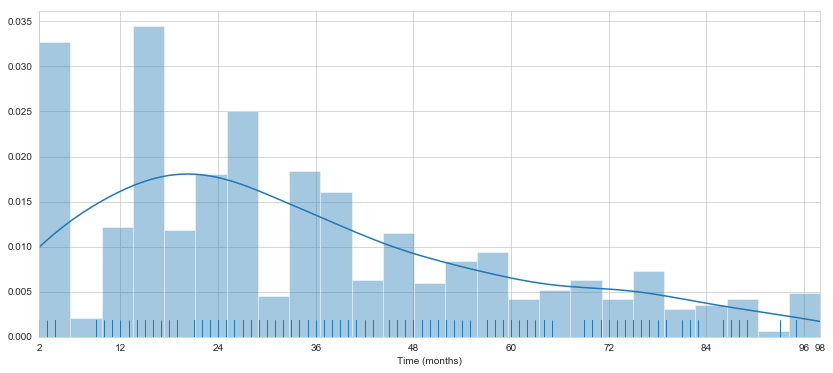

In [128]:
plt.figure(figsize=(14,6))
plt.xlim(mini,maxi) ##no data of people donating in the last month sto I start from 2 months ago
plt.xticks([mini,12,24,36,48,60,72,84,96,maxi])
sns.distplot(df['Time (months)'],bins=25,rug=True)

From this distribution we can see that most of people started donating blood in the past 3 years (36 months)

Let's now investigate a possible relation between Frequency of blood donations and Time since first donation

In [125]:
df['Frequency (times)'].value_counts().sort_values(ascending=False).head(10) ##most people donated once or twice

1     158
2     112
3      87
4      62
5      62
6      52
7      43
8      31
9      24
11     22
Name: Frequency (times), dtype: int64

C:\Users\vasil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


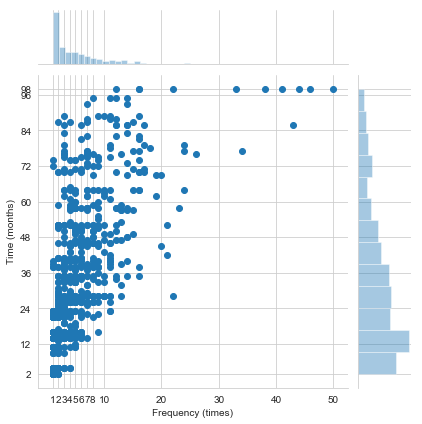

In [135]:
j = sns.jointplot(x='Frequency (times)',y='Time (months)',data=df)
j.ax_joint.set_xticks([1,2,3,4,5,6,7,8,10,20,30,40,50])
j.ax_joint.set_yticks([mini,12,24,36,48,60,72,84,96,maxi])

Let's answer the question of how many people of the once that have only donated once just started doing so in the last couple of years

In [93]:
df[(df['Frequency (times)'] == 1) & (df['Time (months)'] < 25)].count()

Recency (months)                              152
Frequency (times)                             152
Monetary (c.c. blood)                         152
Time (months)                                 152
whether he/she donated blood in March 2007    152
dtype: int64

So 152 out of 158 or ~97% of one time donors are new donors ( Time < 2 years )


Let's see how many people have donated more than once and ( Time < 2 years ) 

In [96]:
df[(df['Frequency (times)'] > 1) & (df['Time (months)'] < 25) ].count()

Recency (months)                              164
Frequency (times)                             164
Monetary (c.c. blood)                         164
Time (months)                                 164
whether he/she donated blood in March 2007    164
dtype: int64

How many of those donated blood on March 2007

In [99]:
df[(df['Frequency (times)'] > 1) & (df['Time (months)'] < 25) & (df['whether he/she donated blood in March 2007']==1)].count()

Recency (months)                              53
Frequency (times)                             53
Monetary (c.c. blood)                         53
Time (months)                                 53
whether he/she donated blood in March 2007    53
dtype: int64

52/164 ~32% of them

Seems like I cannot take an educated guess for whether or not people will donate blood more than once not just based on how long they have been a donor with much accuracy

Time for a pairplot to check out the pairwise relation of all my variables

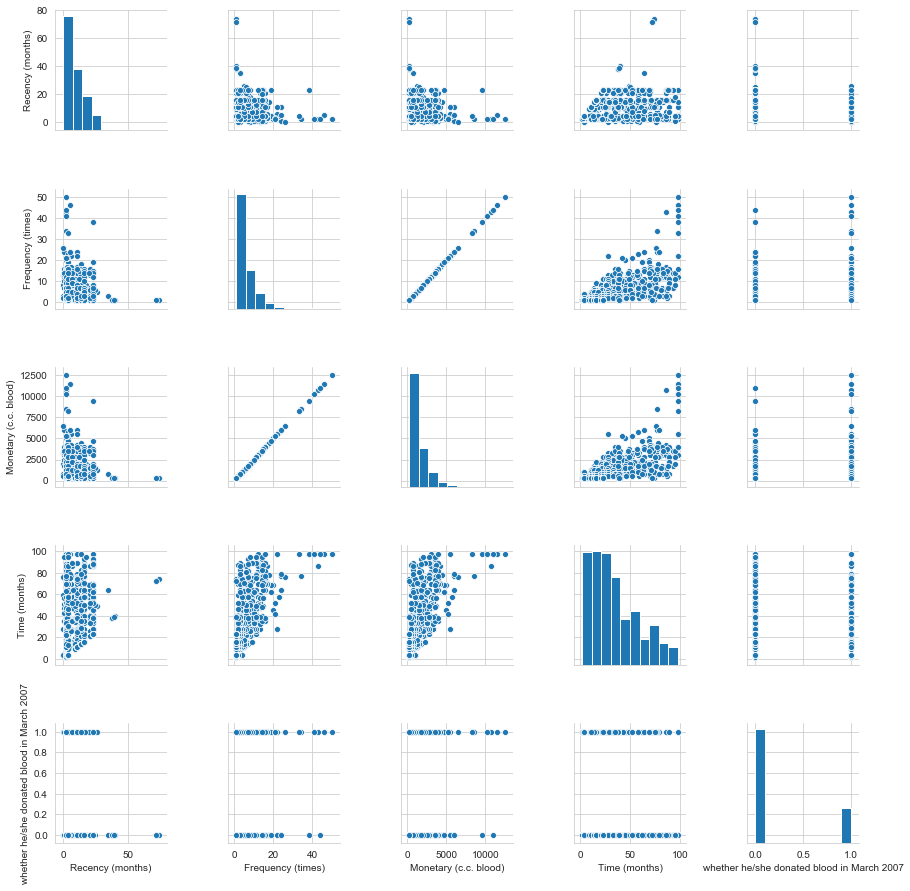

In [101]:
sns.pairplot(data=df)

<strong>Let's create a machine learning model that can better analyze my data and come up with a prediction</strong>

Split my data to a training and a testing set

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [186]:
X = df[['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)','Time (months)']] ## The variables I will use to predict
y = df['whether he/she donated blood in March 2007'] ## The label I want to predict

In [206]:
##random_state so I have consistent results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=98) 

For starters let's use a simple logistic regression model

In [207]:
from sklearn.linear_model import LogisticRegression

In [208]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Time to make some predictions:

In [209]:
logpred = logmodel.predict(X_test)

and evaluate our model

In [210]:
from sklearn.metrics import classification_report, confusion_matrix

In [211]:
print(confusion_matrix(y_test,logpred), '\n\n', classification_report(y_test,logpred))

[[171   2]
 [ 46   6]] 

              precision    recall  f1-score   support

          0       0.79      0.99      0.88       173
          1       0.75      0.12      0.20        52

avg / total       0.78      0.79      0.72       225



78% accuracy for such a simple model is very good  
  
2 Type 1 errors ( False Positive )   
46  Type 1 errors ( False Negative )  

In [212]:
y_test.value_counts()

0    173
1     52
Name: whether he/she donated blood in March 2007, dtype: int64